## Exploratory Data Analysis

#### Packages

In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.describe()

Id  ConfirmedCases    Daily Cases     Fatalities  \
count  29171.000000    2.886000e+04   28860.000000   28860.000000   
mean   14586.000000    3.835477e+04     832.787110    2203.367013   
std     8421.086688    3.853855e+05    7463.499456   21305.938047   
min        1.000000    0.000000e+00  -29726.000000       0.000000   
25%     7293.500000    1.600000e+01       0.000000       0.000000   
50%    14586.000000    3.120000e+02       4.000000       6.000000   
75%    21878.500000    3.429500e+03      79.000000      78.000000   
max    29171.000000    1.201712e+07  214930.000000  549276.000000   

         new_deaths  total_cases_per_million  new_cases_per_million  \
count  28860.000000             28796.000000           28796.000000   
mean      38.064865               898.136764              16.100114   
std      336.856524              2283.242660              62.614818   
min    -1918.000000                 0.000000            -437.881000   
25%        0.000000                 4.796000               0.000000   
50%        0.000000               103.478000               0.588000   
75%        2.000000               666.063250               9.013000   
max    10489.000000             35248.485000            4944.376000   

       total_deaths_per_million  new_deaths_per_million   total_tests  ...  \
count              28796.000000            28796.000000  8.958000e+03  ...   
mean                  35.531995                0.526123  6.043859e+05  ...   
std                  116.279845                3.019536  2.343174e+06  ...   
min                    0.000000              -41.023000  1.000000e+00  ...   
25%                    0.000000                0.000000  2.121850e+04  ...   
50%                    1.208000                0.000000  9.199800e+04  ...   
75%                   15.216000                0.114000  3.560658e+05  ...   
max                 1237.551000              200.040000  3.743167e+07  ...   

       aged_70_older  gdp_per_capita  extreme_poverty  cvd_death_rate  \
count   26173.000000    26003.000000     17400.000000    26331.000000   
mean        6.051125    21839.170009        11.177098      248.696093   
std         4.383702    20821.221640        18.481635      118.251181   
min         0.526000      661.240000         0.100000       79.370000   
25%         2.171000     6171.884000         0.500000      152.783000   
50%         4.593000    15308.712000         1.600000      235.848000   
75%         9.732000    33132.320000        14.800000      317.840000   
max        18.493000   116935.600000        77.600000      724.417000   

       diabetes_prevalence  female_smokers  male_smokers  \
count         27199.000000    21026.000000  20780.000000   
mean              8.036564       11.064407     32.642258   
std               4.100263       10.519920     13.312446   
min               0.990000        0.100000      7.700000   
25%               5.310000        1.900000     21.400000   
50%               7.110000        6.900000     31.400000   
75%              10.080000       19.800000     40.900000   
max              23.360000       44.000000     78.100000   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  
count            11924.000000                24022.000000     28765.000000  
mean                53.685981                    3.164303        74.347387  
std                 31.353992                    2.562840         7.284360  
min                  1.188000                    0.100000        53.280000  
25%                 23.437000                    1.380000        70.600000  
50%                 59.550000                    2.540000        75.880000  
75%                 83.741000                    4.210000        80.180000  
max                 98.999000                   13.800000        86.750000  

[8 rows x 30 columns]

In [4]:
test.describe()

ForecastId
count  29171.000000
mean   14586.000000
std     8421.086688
min        1.000000
25%     7293.500000
50%    14586.000000
75%    21878.500000
max    29171.000000

In [5]:
train.sample(6)

Id iso_code Province_State            Country_Region        Date  \
19657  19658      MNP        Oceania  Northern Mariana Islands  21/04/2020   
7939    7940      ECU  South America                   Ecuador  25/06/2020   
23329  23330      SLE         Africa              Sierra Leone  29/05/2020   
12762  12763      IRQ           Asia                      Iraq  20/01/2020   
24336  24337      KOR           Asia               South Korea  27/05/2020   
12855  12856      IRQ           Asia                      Iraq  24/04/2020   

       ConfirmedCases  Daily Cases  Fatalities  new_deaths  \
19657            14.0          0.0         2.0         0.0   
7939          52334.0        691.0      4309.0        35.0   
23329           812.0         30.0        45.0         0.0   
12762             0.0          0.0         0.0         0.0   
24336         11265.0         40.0       269.0         0.0   
12855          1677.0         75.0        83.0         0.0   

       total_cases_per_million  ...  aged_70_older  gdp_per_capita  \
19657                  243.237  ...            NaN             NaN   
7939                  2966.265  ...          4.458       10581.936   
23329                  101.793  ...          1.285        1390.300   
12762                    0.000  ...          1.957       15663.986   
24336                  219.723  ...          8.622       35938.374   
12855                   41.693  ...          1.957       15663.986   

       extreme_poverty  cvd_death_rate  diabetes_prevalence  female_smokers  \
19657              NaN         194.994                  NaN             NaN   
7939               3.6         140.448                 5.55             2.0   
23329             52.2         325.721                 2.42             8.8   
12762              2.5         218.612                 8.83             NaN   
24336              0.2          85.998                 6.80             6.2   
12855              2.5         218.612                 8.83             NaN   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
19657           NaN                     NaN                         NaN   
7939           12.3                  80.635                        1.50   
23329          41.3                  19.275                         NaN   
12762           NaN                  94.576                        1.40   
24336          40.9                     NaN                       12.27   
12855           NaN                  94.576                        1.40   

      life_expectancy  
19657           76.74  
7939            77.01  
23329           54.70  
12762           70.60  
24336           83.03  
12855           70.60  

[6 rows x 35 columns]

In [6]:
test.sample(6)

ForecastId iso_code Province_State    Country_Region        Date
13785       13786      JPN           Asia             Japan  18/02/2020
20587       20588      PNG        Oceania  Papua New Guinea  29/04/2020
19865       19866      NOR         Europe            Norway  07/05/2020
24507       24508      ESP         Europe             Spain  01/02/2020
10597       10598      GRC         Europe            Greece  20/03/2020
10257       10258      DEU         Europe           Germany  10/06/2020

In [7]:
df = train.groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

ConfirmedCases
Country_Region                
United States        3055004.0
Brazil               1713160.0
India                 767296.0
Russia                700792.0
United Kingdom        313483.0
Peru                  312911.0
Chile                 303083.0
Mexico                275003.0
Spain                 252513.0
Iran                  248379.0

In [8]:
fig = px.bar(top10, x=top10.index, y='ConfirmedCases', labels={'x':'Country'},
             color="ConfirmedCases", color_continuous_scale=px.colors.sequential.Bluyl)
fig.update_layout(title_text='Confirmed COVID-19 cases by country')
fig.show()

### Confirmed COVID-19 cases per day in Turkey

In [9]:
df_by_date = pd.DataFrame(train.groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Turkey') &(df_by_date.Date >= '2019-03-01')].sort_values('ConfirmedCases',ascending = True), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.OrRd)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Turkey')
fig.show()

In [10]:
df_by_date = pd.DataFrame(train.groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'United States') &(df_by_date.Date >= '2019-03-01')].sort_values('ConfirmedCases',ascending = True), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.OrRd)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in US')
fig.show()

In [11]:
df_by_date = pd.DataFrame(train.groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Italy') &(df_by_date.Date >= '2019-03-01')].sort_values('ConfirmedCases',ascending = True), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.OrRd)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Italy')
fig.show()

In [12]:
df_by_date = pd.DataFrame(train.groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Spain') &(df_by_date.Date >= '2019-03-01')].sort_values('ConfirmedCases',ascending = True), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.OrRd)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Spain')
fig.show()

In [13]:
df=train.groupby(['Date','Country_Region']).agg('sum').reset_index()
df.tail(5)

Date        Country_Region     Id  ConfirmedCases  Daily Cases  \
29166  31/12/2019  United Arab Emirates  27191             0.0          0.0   
29167  31/12/2019        United Kingdom  27377             0.0          0.0   
29168  31/12/2019         United States  27569             0.0          0.0   
29169  31/12/2019               Vietnam  28334             0.0          0.0   
29170  31/12/2019                 World  28916            27.0         27.0   

       Fatalities  new_deaths  total_cases_per_million  new_cases_per_million  \
29166         0.0         0.0                    0.000                  0.000   
29167         0.0         0.0                    0.000                  0.000   
29168         0.0         0.0                    0.000                  0.000   
29169         0.0         0.0                    0.000                  0.000   
29170         0.0         0.0                    0.003                  0.003   

       total_deaths_per_million  ...  aged_70_older  gdp_per_capita  \
29166                       0.0  ...          0.526       67293.483   
29167                       0.0  ...         12.527       39753.244   
29168                       0.0  ...          9.732       54225.446   
29169                       0.0  ...          4.718        6171.884   
29170                       0.0  ...          5.355       15469.207   

       extreme_poverty  cvd_death_rate  diabetes_prevalence  female_smokers  \
29166              0.0         317.840                17.26           1.200   
29167              0.2         122.137                 4.28          20.000   
29168              1.2         151.089                10.79          19.100   
29169              2.0         245.465                 6.00           1.000   
29170             10.0         233.070                 8.51           6.434   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
29166        37.400                   0.000                       1.200   
29167        24.700                   0.000                       2.540   
29168        24.600                   0.000                       2.770   
29169        45.900                  85.847                       2.600   
29170        34.635                  60.130                       2.705   

       life_expectancy  
29166            77.97  
29167            81.32  
29168            78.86  
29169            75.40  
29170            72.58  

[5 rows x 32 columns]

### Time Based Evaluation

In [14]:
train1=pd.read_csv("compare.csv")


In [15]:
df=train1.groupby(['Date','Country_Region']).sum().reset_index()
df.tail(5)

Date                Country_Region     Id  ConfirmedCases  \
409  30/03/2020  United States Virgin Islands  27767              30   
410  30/04/2020  United States Virgin Islands  27797              66   
411  30/05/2020  United States Virgin Islands  27827              69   
412  30/06/2020  United States Virgin Islands  27858              84   
413  31/05/2020  United States Virgin Islands  27828              69   

     Daily Cases  Fatalities  new_deaths  total_cases_per_million  \
409            8           0           0                  287.293   
410            7           4           0                  632.045   
411            0           6           0                  660.774   
412            3           6           0                  804.420   
413            0           6           0                  660.774   

     new_cases_per_million  total_deaths_per_million  ...  aged_70_older  \
409                 76.611                     0.000  ...         10.799   
410                 67.035                    38.306  ...         10.799   
411                  0.000                    57.459  ...         10.799   
412                 28.729                    57.459  ...         10.799   
413                  0.000                    57.459  ...         10.799   

     gdp_per_capita  extreme_poverty  cvd_death_rate  diabetes_prevalence  \
409             0.0              0.0          273.67                12.26   
410             0.0              0.0          273.67                12.26   
411             0.0              0.0          273.67                12.26   
412             0.0              0.0          273.67                12.26   
413             0.0              0.0          273.67                12.26   

     female_smokers  male_smokers  handwashing_facilities  \
409             0.0           0.0                     0.0   
410             0.0           0.0                     0.0   
411             0.0           0.0                     0.0   
412             0.0           0.0                     0.0   
413             0.0           0.0                     0.0   

     hospital_beds_per_thousand  life_expectancy  
409                         0.0            80.58  
410                         0.0            80.58  
411                         0.0            80.58  
412                         0.0            80.58  
413                         0.0            80.58  

[5 rows x 32 columns]

In [16]:
def pltCountry_cases(ConfirmedCases,*argv):
    f, ax=plt.subplots(figsize=(25,10))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]

        plt.plot(country['Date'],country['ConfirmedCases'],linewidth=3)
       
        plt.xticks(rotation=10)
        plt.legend(labels)
        ax.set(title='Evolution of the number of cases' )
  

In [17]:
def pltCountry_fatalities(Fatalities,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['Fatalities'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of fatalities' )

In [18]:
def pltCountry_tests(total_tests,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['total_tests'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of tests' )

In [19]:
def pltTotal_cases_per_million(total_cases_per_million,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['total_tests'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the total cases per million' )

In [20]:
def pltCountry_tests_smooth(new_tests_smoothed,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['new_tests_smoothed'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of tests smoothed' )

### Confirmed Cases, Fatalities, Total Tests in Turkey (01/06/2020-09/07/2020)

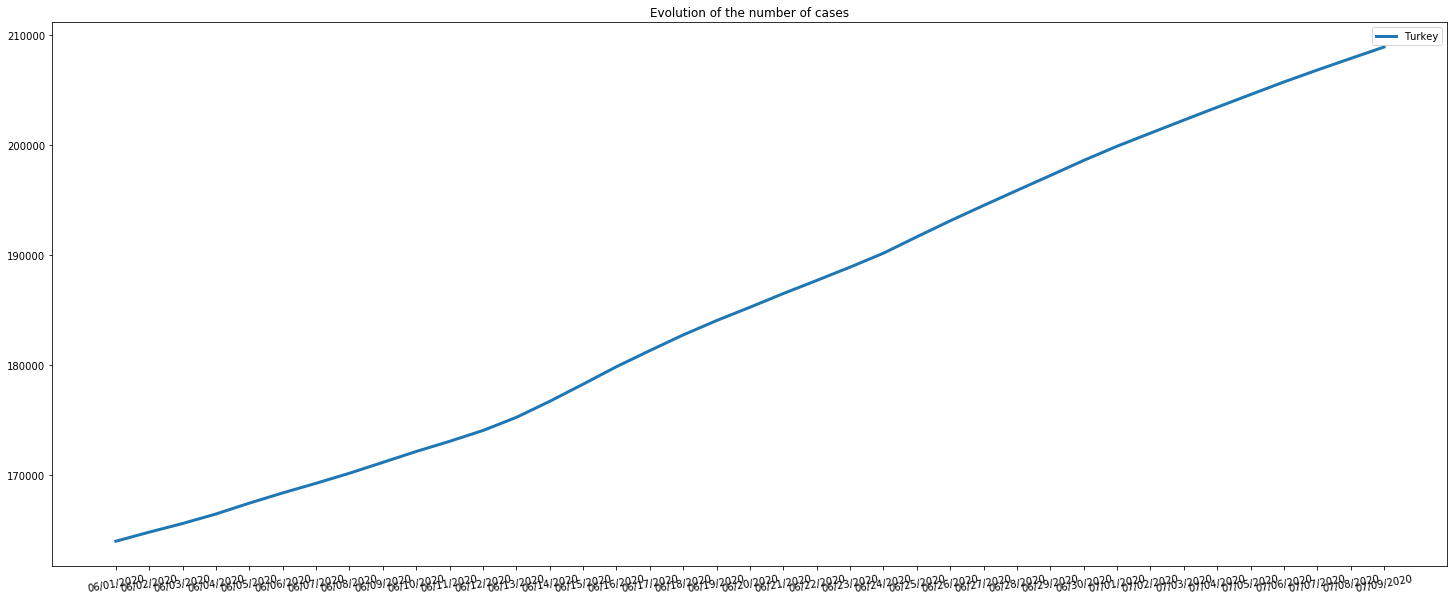

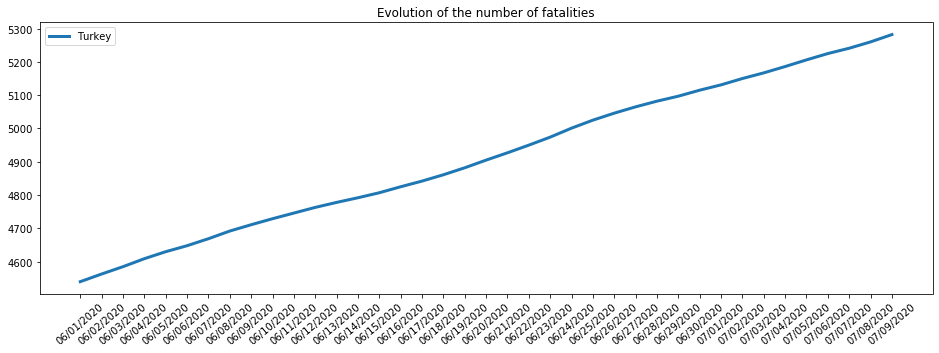

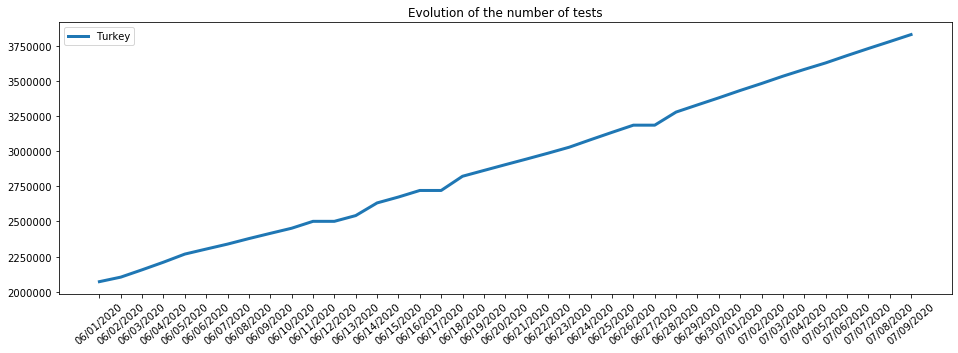

In [21]:
pltCountry_cases('ConfirmedCases','Turkey')
pltCountry_fatalities('Fatalities','Turkey')
pltCountry_tests('total_tests','Turkey')

### Confirmed Cases, Fatalities, Total Tests in Germany (01/06/2020 - 05/07/2020)

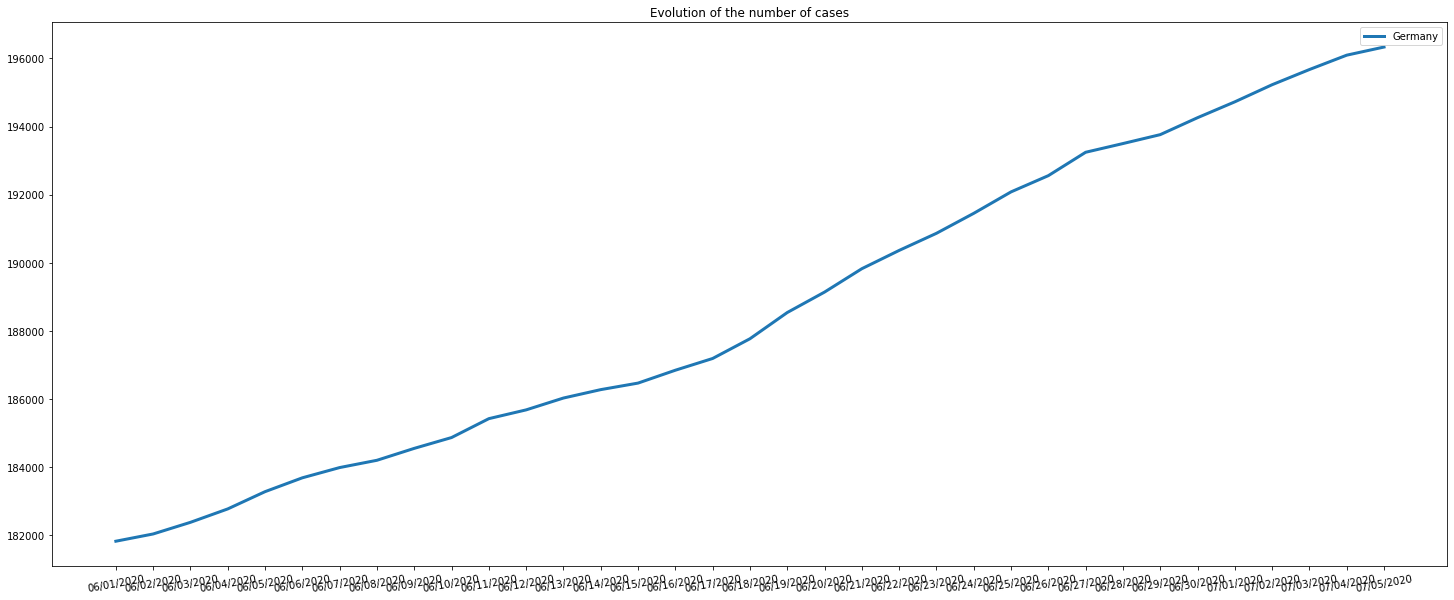

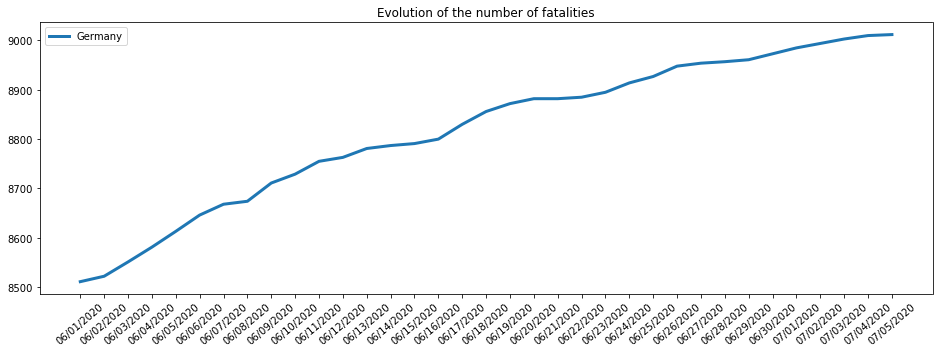

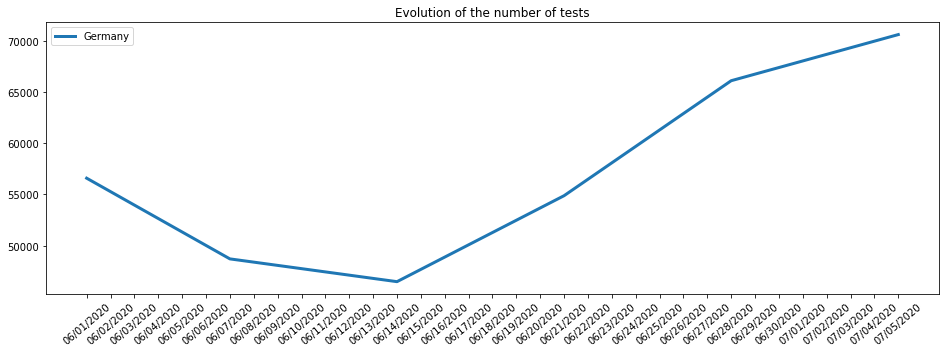

In [22]:
pltCountry_cases('ConfirmedCases','Germany')
pltCountry_fatalities('Fatalities','Germany')
pltCountry_tests('total_tests','Germany')

### Confirmed Cases, Fatalities, Total Tests in Spain (01/06/2020 - 08/07/2020)

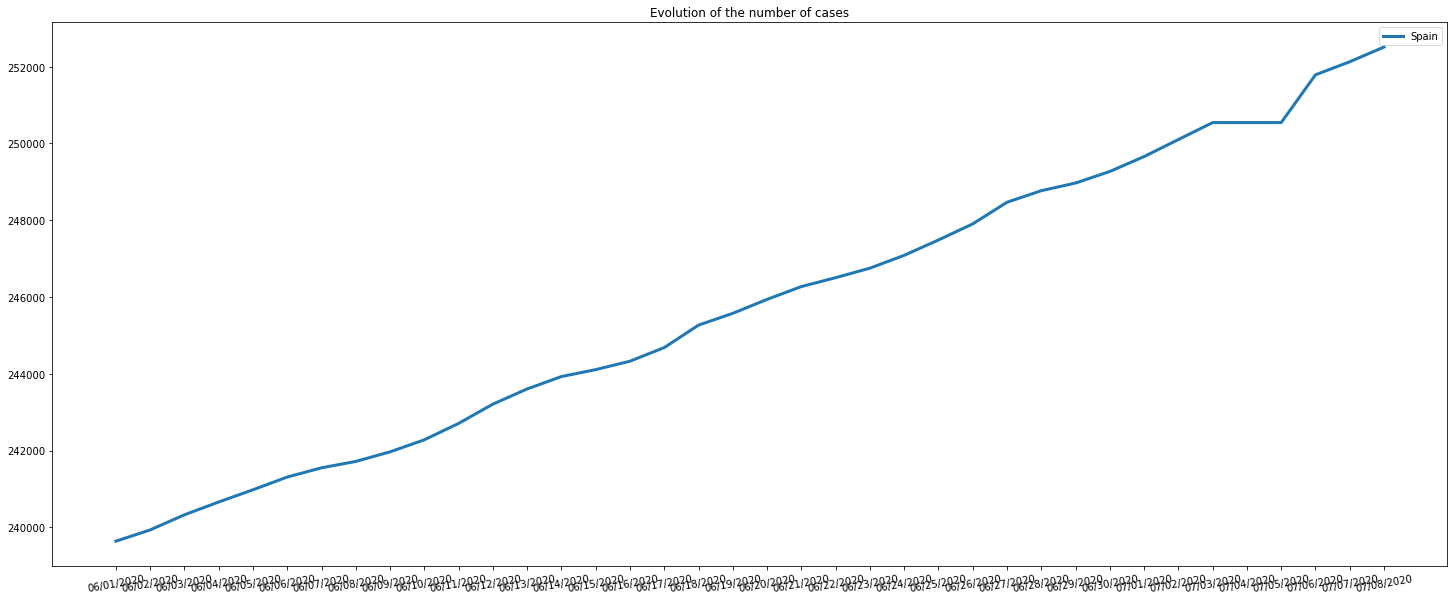

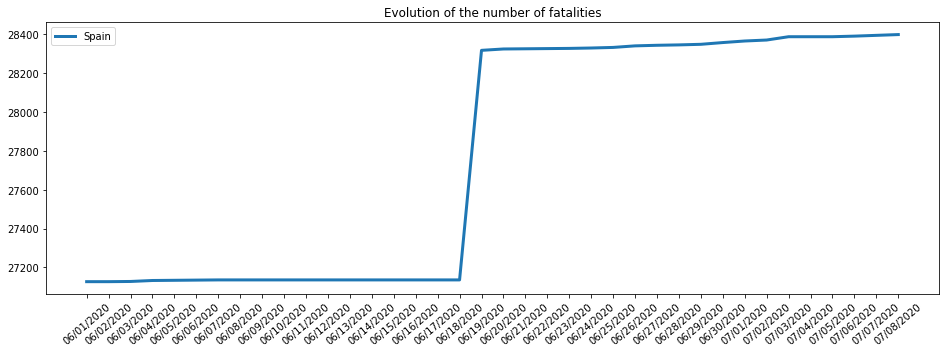

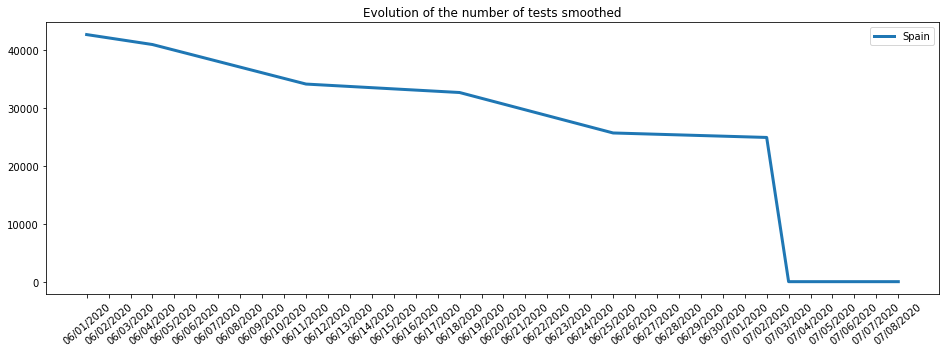

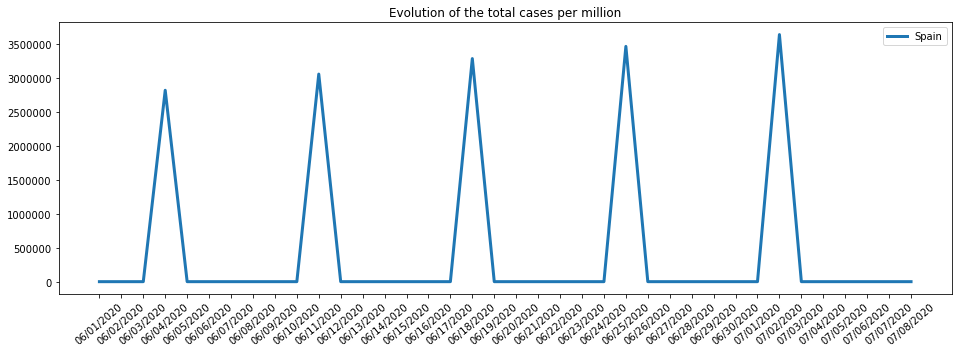

In [23]:
pltCountry_cases('ConfirmedCases','Spain')
pltCountry_fatalities('Fatalities','Spain')
pltCountry_tests_smooth('new_tests_smoothed','Spain')
pltTotal_cases_per_million('pltTotal_cases_per_million','Spain')

### Confirmed Cases, Fatalities, Total Tests in United Kingdom (01/06/2020 - 09/07/2020)

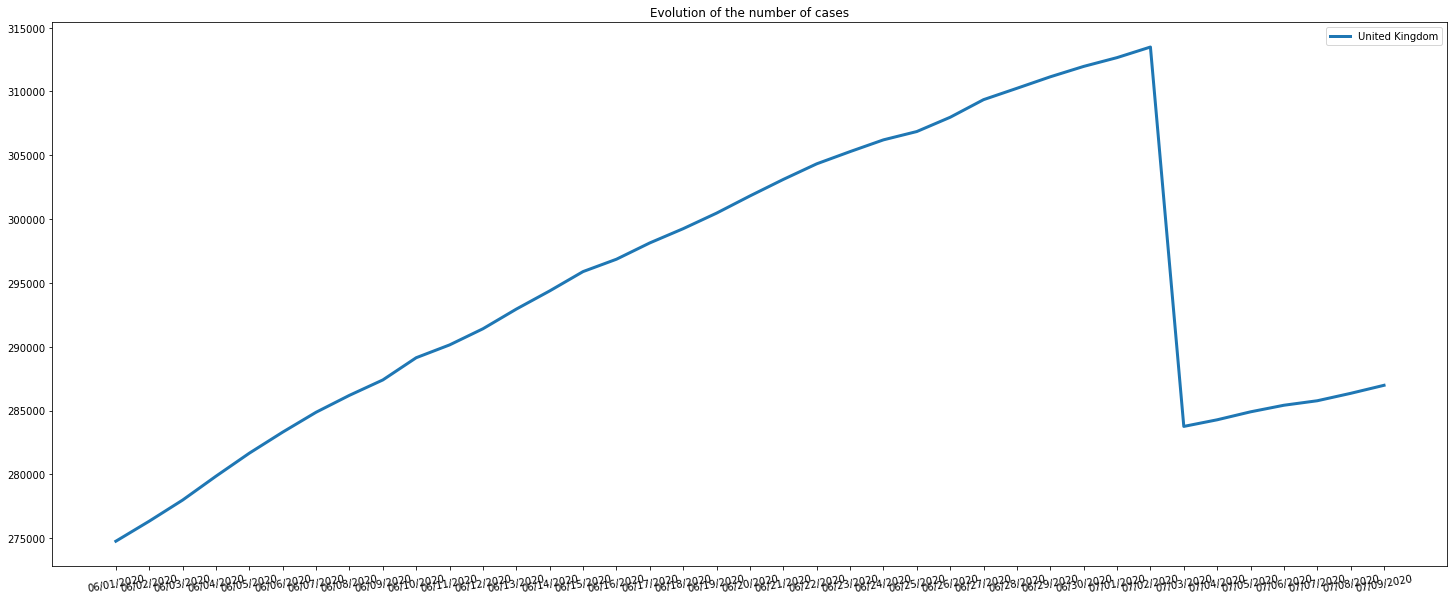

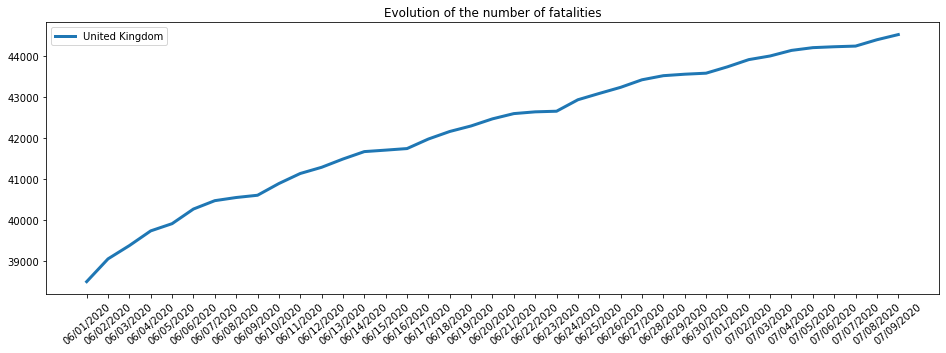

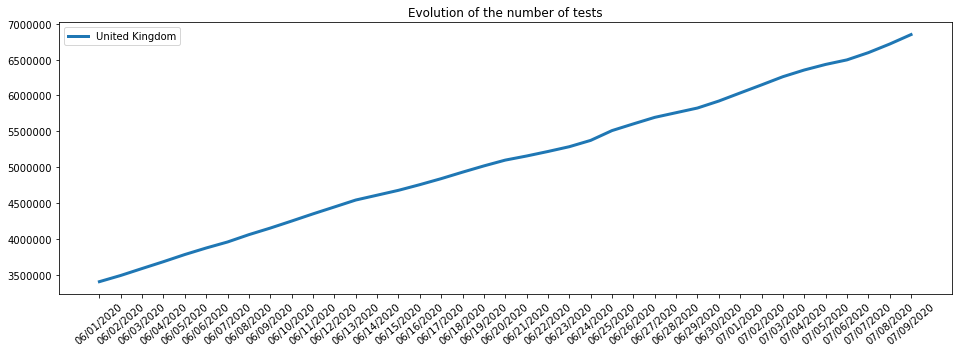

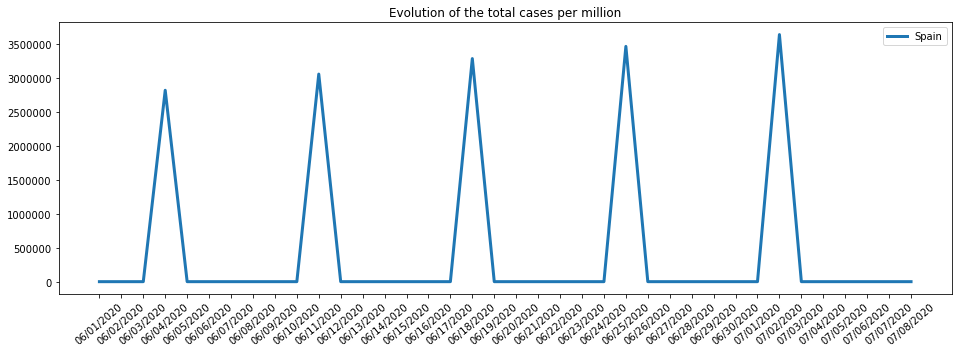

In [24]:
pltCountry_cases('ConfirmedCases','United Kingdom')
pltCountry_fatalities('Fatalities','United Kingdom')
pltCountry_tests('total_tests','United Kingdom')
pltTotal_cases_per_million('pltTotal_cases_per_million','Spain')

### Confirmed Cases, Fatalities, Total Tests Comparasion (01/06/2020 - 09/07/2020)

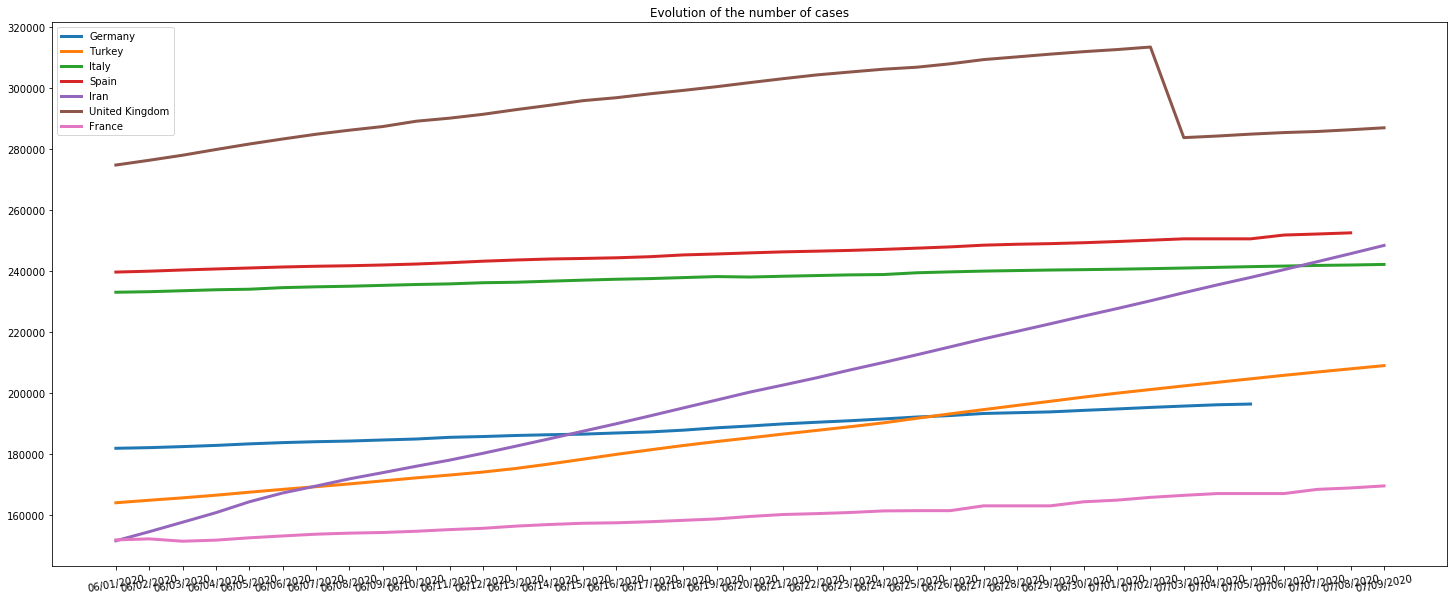

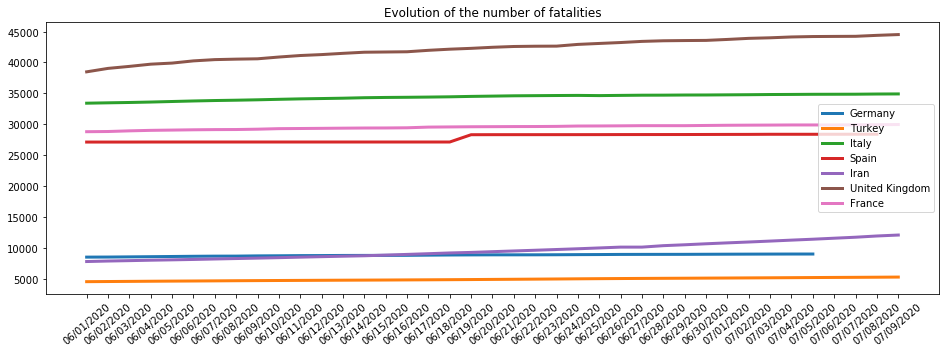

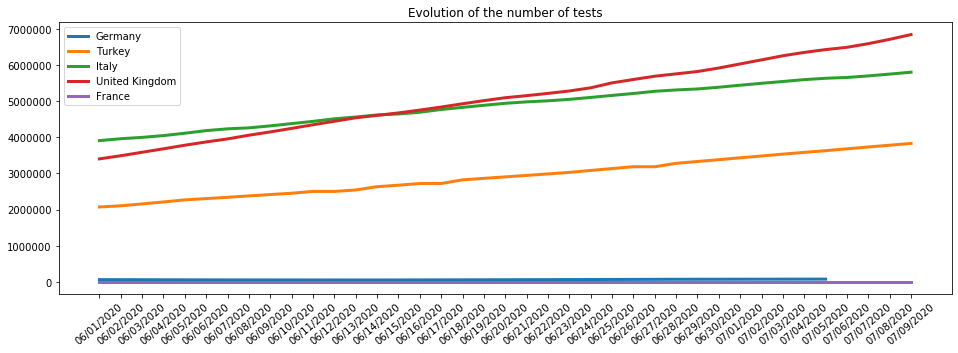

In [25]:
pltCountry_cases('ConfirmedCases', 'Germany','Turkey', 'Italy', 'Spain','Iran','United Kingdom','France')
pltCountry_fatalities('Fatilities','Germany','Turkey', 'Italy', 'Spain','Iran','United Kingdom','France')
pltCountry_tests('total_tests','Germany','Turkey', 'Italy','United Kingdom','France')

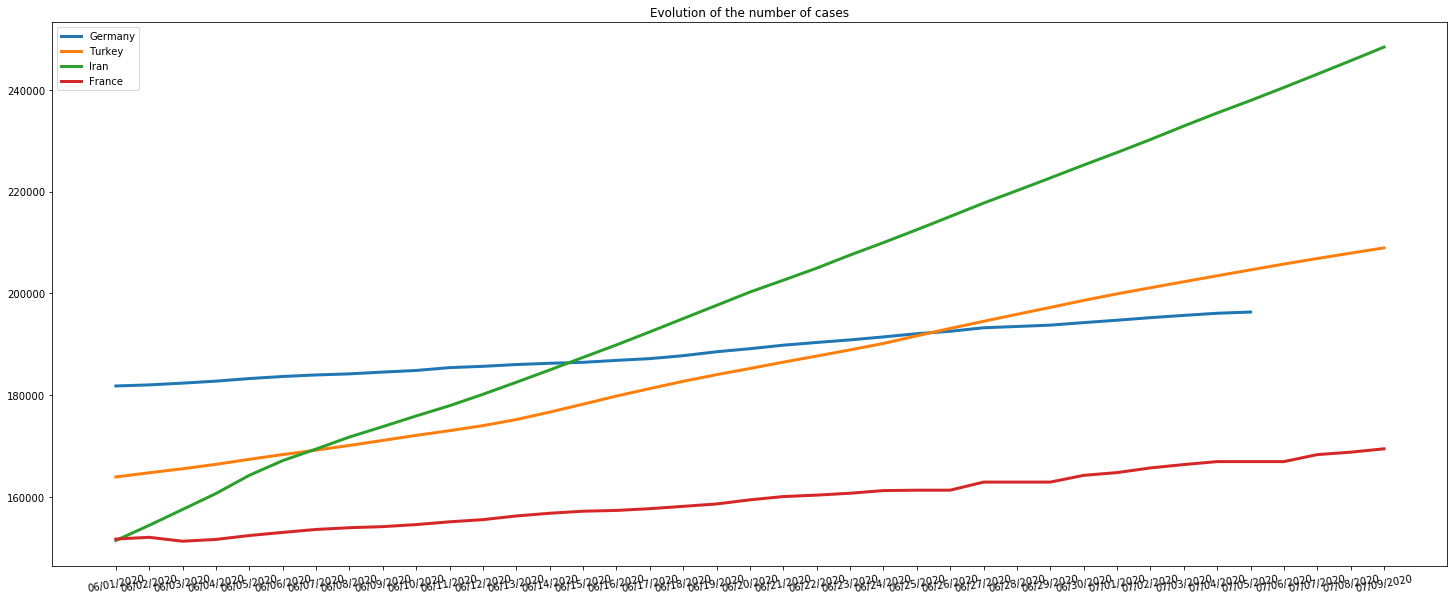

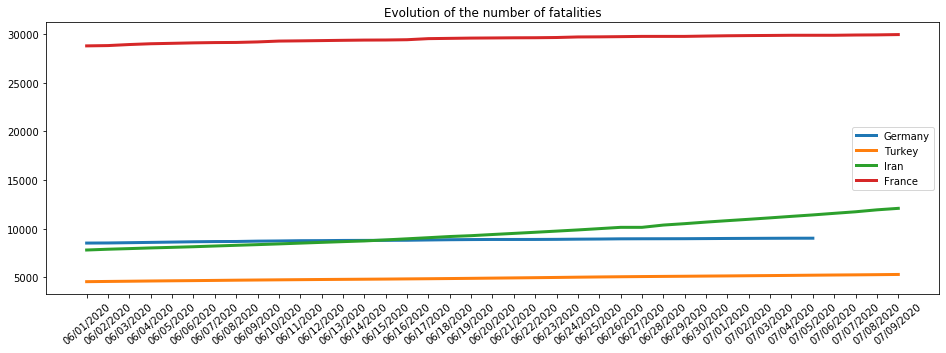

In [26]:
pltCountry_cases('ConfirmedCases', 'Germany','Turkey', 'Iran','France')
pltCountry_fatalities('Fatilities','Germany','Turkey', 'Iran','France')

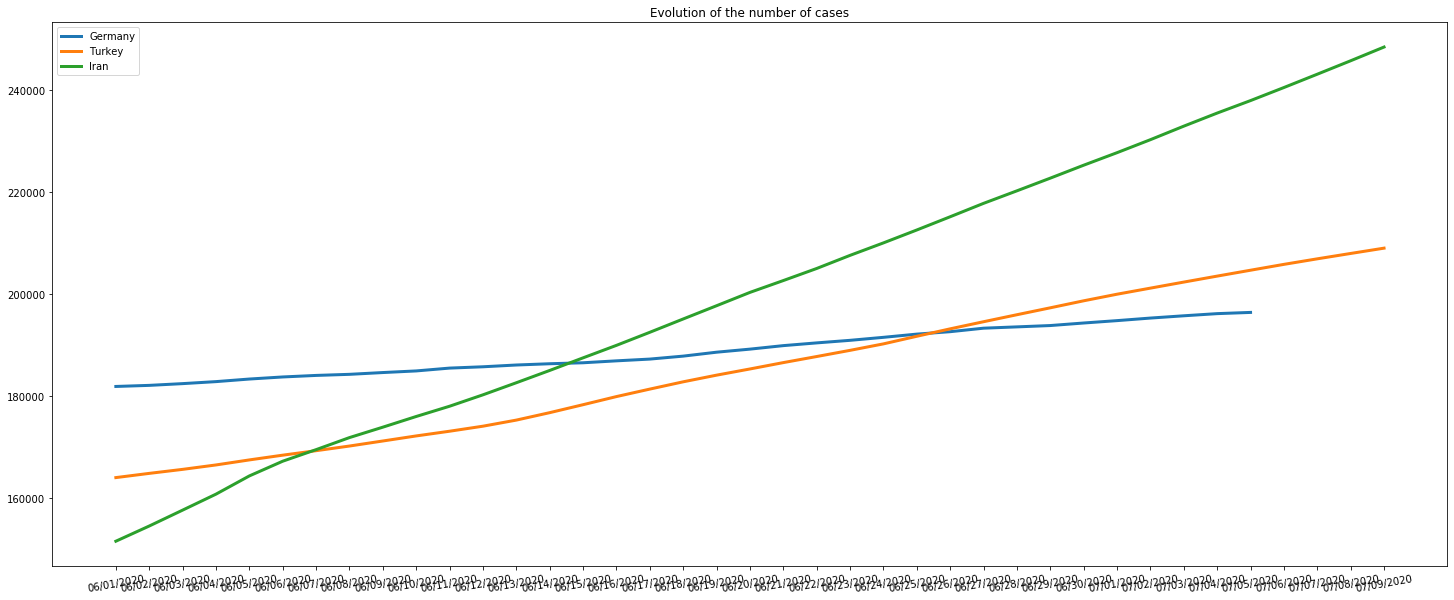

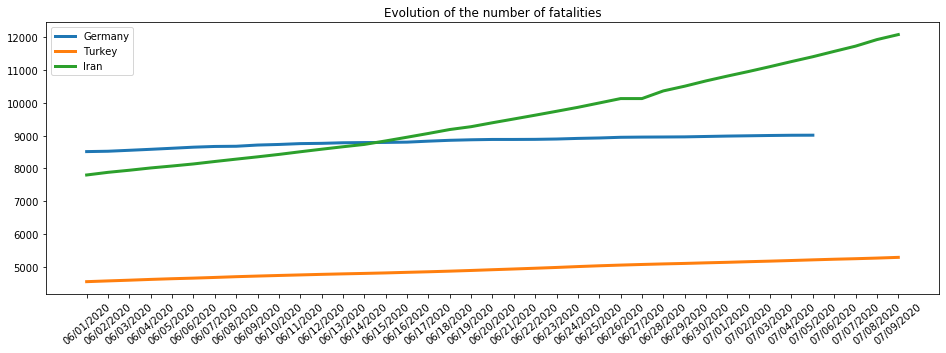

In [27]:
pltCountry_cases('ConfirmedCases', 'Germany','Turkey', 'Iran')
pltCountry_fatalities('Fatilities','Germany','Turkey', 'Iran')

In [28]:
def pltCountry_tests_smooth(new_tests_smoothed,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['new_tests_smoothed'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of tests smoothed' )


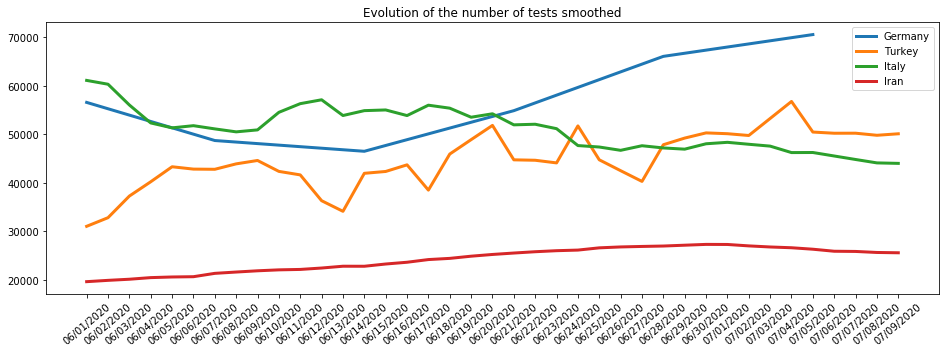

In [29]:
pltCountry_tests_smooth('total_tests','Germany','Turkey','Italy','Iran')

In [30]:
sns.set(palette = 'Set1',style='darkgrid')
#Function for making a time serie on a designated country and plotting the rolled mean and standard 
def roll(country,case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case])
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

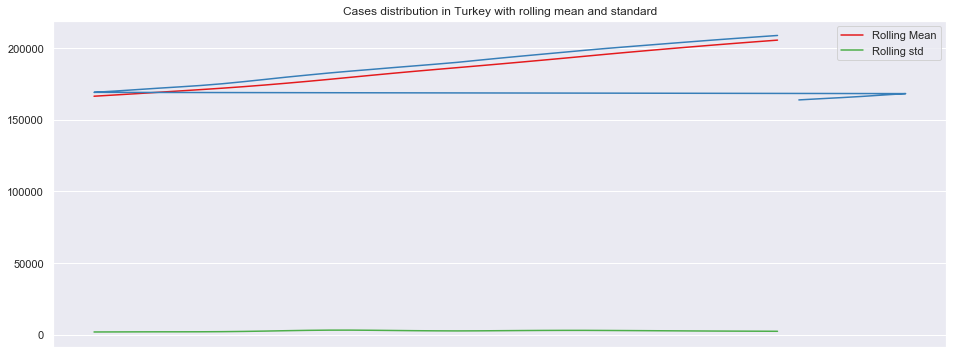

In [31]:
tsC1=roll('Turkey')
rollPlot('Turkey')

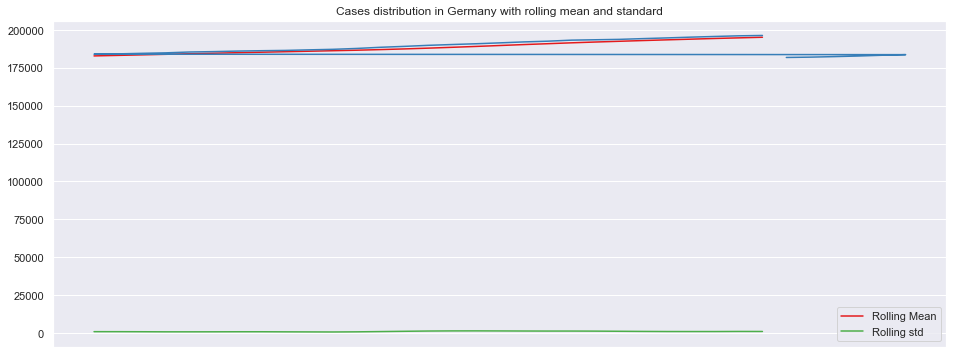

In [32]:
tsC1=roll('Germany')
rollPlot('Germany')

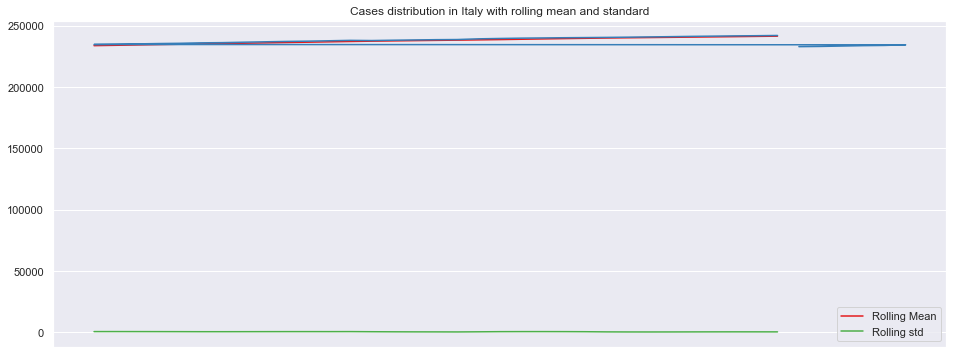

In [33]:
tsC1=roll('Italy')
rollPlot('Italy')

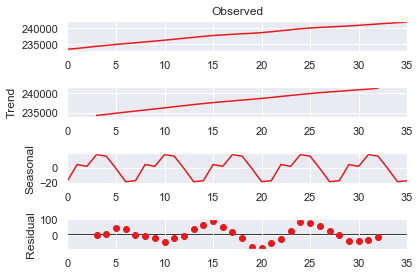

In [34]:
fig=sm.tsa.seasonal_decompose(tsC1.values,freq=7).plot()

In [35]:
#Function to check the stationarity of the time serie using Dickey fuller test
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

#For China
tsC=tsC1['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -2.470938
p-value                         0.122707
#Lags Used                      8.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


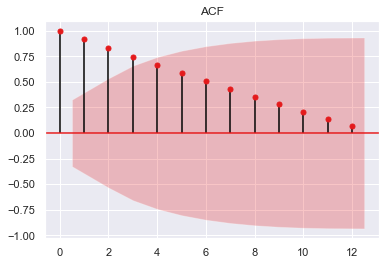

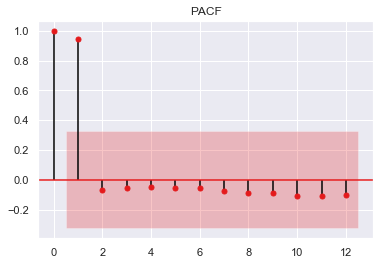

In [36]:
def corr(ts):
    plot_acf(ts,lags=12,title="ACF")
    plot_pacf(ts,lags=12,title="PACF")
    

#For Turkey
corr(tsC1)